In [1]:
%matplotlib inline

In [2]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_claudius #demo data

import pandas as pd
import glob
import numpy as np
#import surfe

In [13]:
data = pd.read_excel(r'C:\Users\ASUS\Desktop\loopstructural\data perthbasin\values_as_cummulative_thickness\perthbasin_cmu-thickness_as_value-data.xlsx')

In [14]:
data = data.rename(columns={'azimuth': 'strike', 'formation': 'feature_name'})

In [15]:
print(data)

                 X             Y            Z      val      strike       dip  \
0    393936.142320  6.693633e+06   957.702303  28203.7  263.276747  1.193492   
1    396918.892567  6.693984e+06   977.204803  28203.7   83.276747  0.349367   
2    351487.758871  6.688629e+06 -7385.646697  28203.7   83.277000  6.546000   
3    338518.168564  6.650709e+06 -4542.306605  28203.7  256.590252  1.789915   
4    397464.032464  6.663078e+06   959.378895  28203.7  268.100891  1.432093   
..             ...           ...          ...      ...         ...       ...   
119  353033.649500  6.688811e+06 -5424.239697   4225.0         NaN       NaN   
120  341942.065600  6.651525e+06 -4152.902105   4225.0         NaN       NaN   
121  342823.407600  6.651735e+06 -4152.902105   4225.0         NaN       NaN   
122  337375.397500  6.650011e+06 -1199.239105   4225.0         NaN       NaN   
123  338177.661300  6.650617e+06 -1227.176105   4225.0         NaN       NaN   

     polarity feature_name  
0         

In [ ]:
data_claudius, bb_claudius = load_claudius()

In [ ]:
print(bb_claudius)

In [16]:
##extent_of_model = np.array([[ 340944.288072, 6637386.,  -7357.485252],
## [ 393936.142320,  6693633.,   957.702303]])

extent_of_model= np.array([[337000,6640000,-18000],  ##taken from extent of model in gempy
[400000,6710000,1000]])


In [17]:
print(extent_of_model[0,:])

[ 337000 6640000  -18000]


In [18]:
print(extent_of_model[1,:])

[ 400000 6710000    1000]


2021-10-17 16:47:30,258 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-10-17 16:47:30,258 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-10-17 16:47:30,258 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.



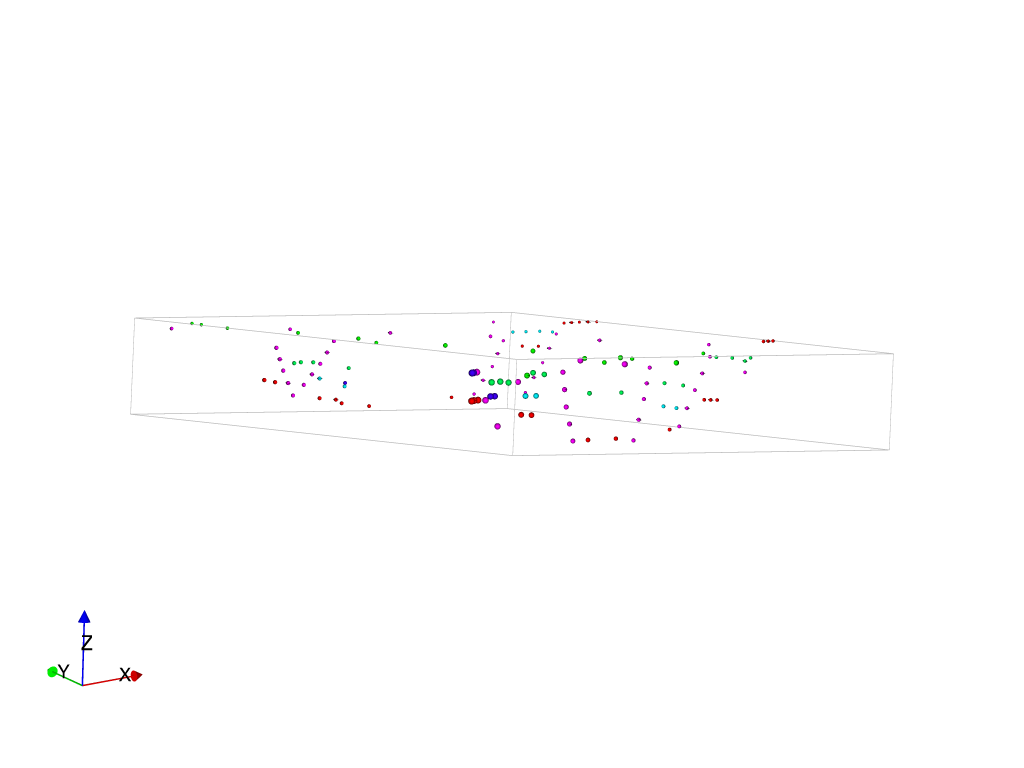

In [19]:
data['feature_name'].unique()

viewer = LavaVuModelViewer(background='white')
viewer.add_value_data(data[~np.isnan(data['val'])][['X','Y','Z']],data[~np.isnan(data['val'])]['val'],name='value points')
viewer.add_vector_data(data[~np.isnan(data['dip'])][['X','Y','Z']],
                       data[~np.isnan(data['strike'])][['X','Y','Z']],name='orientation points')
viewer.rotate([-85.18760681152344, 42.93233871459961, 0.8641873002052307])
viewer.display()

In [36]:
model = GeologicalModel(extent_of_model[0,:],extent_of_model[1,:])
model.set_model_data(data)

strati = model.create_and_add_foliation('strati',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )


fault_Coomallo = model.create_and_add_fault('Coomallo',
             displacement=1000., 
                            fault_slip_vector= np.array([2,3,4],dtype = float), 
                            fault_extent=200000.,
                            fault_influence=10000., 
                            fault_vectical_radius = 3000.,
                              interpolatortype='FDI',
                               nelements=1e4,
                                            buffer = 0.5
                              # solver='pyamg'
                              )


fault_Darling = model.create_and_add_fault('Darling',
                               displacement=1000., 
                            fault_slip_vector= np.array([2,3,4],dtype = float),
                            fault_extent=200000.,
                            fault_influence=10000., 
                            fault_vectical_radius = 3000.,
                              interpolatortype='FDI',
                               nelements=1e4,
                               buffer = 0.5
                              )

fault_Hypo_fault_E = model.create_and_add_fault('Hypo_fault_E',
                           displacement=1000., 
                            fault_slip_vector= np.array([2,3,4],dtype = float),
                          fault_extent=200000.,
                            fault_influence=10000., 
                            fault_vectical_radius = 3000.,
                              interpolatortype='FDI',
                               nelements=1e4,
                                buffer = 0.5
                              )

fault_Hypo_fault_W = model.create_and_add_fault('Hypo_fault_W',
                           displacement=1000., 
                            fault_slip_vector= np.array([2,3,4],dtype = float),
                           fault_extent=200000.,
                            fault_influence=10000., 
                            fault_vectical_radius = 3000.,
                              interpolatortype='FDI',
                               nelements=1e4,
                                buffer = 0.5
                              )

fault_Urella_North = model.create_and_add_fault('Urella_North',
                            displacement=1000., 
                            fault_slip_vector= np.array([2,3,4],dtype = float),
                           fault_extent=200000.,
                            fault_influence=10000., 
                            fault_vectical_radius = 3000.,                
                              interpolatortype='FDI',
                               nelements=1e4,
                                buffer = 0.5
                              )

fault_Urella_South = model.create_and_add_fault('Urella_South',
                           displacement=1000., 
                            fault_slip_vector= np.array([2,3,4],dtype = float),
                           fault_extent=200000.,
                            fault_influence=10000., 
                            fault_vectical_radius = 3000.,
                              interpolatortype='FDI',
                               nelements=1e4,
                                buffer = 0.5
                              )
fault_Abrolhos_Transfer = model.create_and_add_fault('Abrolhos_Transfer',
                         displacement=1000., 
                            fault_slip_vector= np.array([2,3,4],dtype = float),
                           fault_extent=200000.,
                            fault_influence=10000., 
                            fault_vectical_radius = 3000.,
                              interpolatortype='FDI',
                               nelements=1e4,
                               buffer = 0.5
                              )

fault_Eneabba_south = model.create_and_add_fault('Eneabba_South',
                        displacement=1000., 
                            fault_slip_vector= np.array([2,3,4],dtype = float),
                          fault_extent=200000.,
                            fault_influence=10000., 
                            fault_vectical_radius = 3000.,            
                              interpolatortype='FDI',
                               nelements=1e4,
                            buffer = 0.5
                               )



2021-10-17 17:15:20,173 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-10-17 17:15:20,173 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead



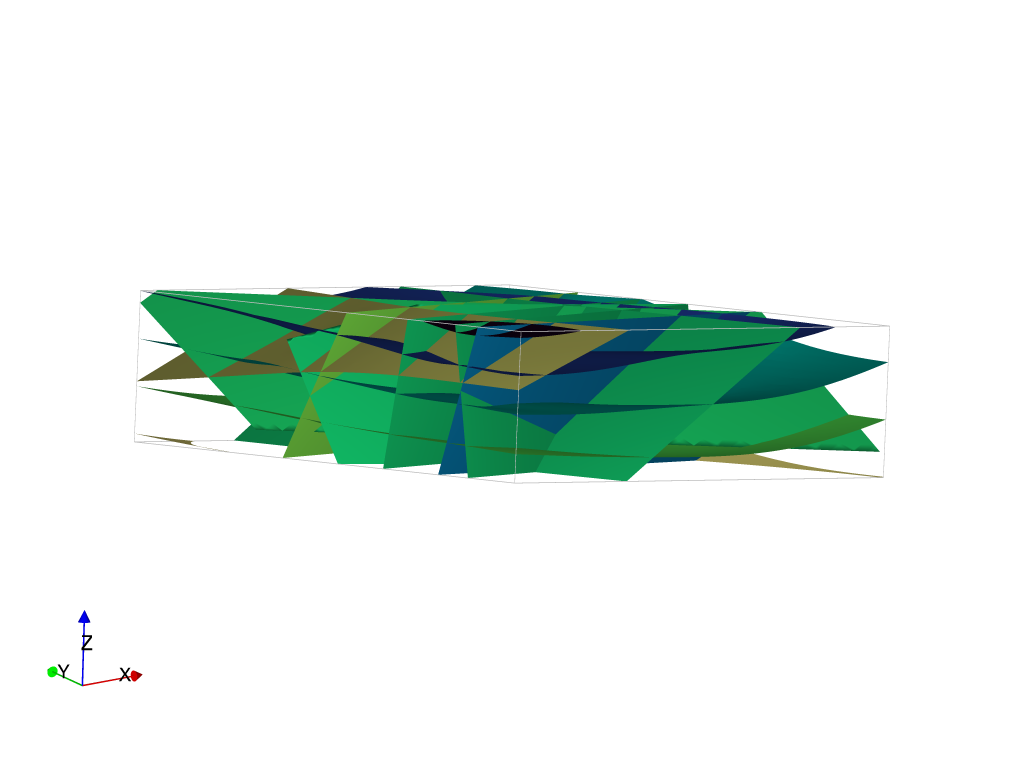

In [37]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(strati,
                     nslices=6,
                    paint_with=strati)

viewer.add_isosurface(fault_Coomallo,
#                       nslices=5
                     # isovalue=10,
                     paint_with=fault_Coomallo)


viewer.add_isosurface(fault_Darling,
                    # isovalue=10,
                     paint_with=fault_Darling)

viewer.add_isosurface(fault_Hypo_fault_E,
                 # isovalue=10,
                     paint_with=fault_Hypo_fault_E)

viewer.add_isosurface(fault_Hypo_fault_W,
                #  isovalue=10,
                     paint_with=fault_Hypo_fault_W)

viewer.add_isosurface(fault_Urella_North ,
                    isovalue=0,
                     paint_with=fault_Urella_North )

viewer.add_isosurface(fault_Urella_South,
                     isovalue=0,
                     paint_with=fault_Urella_South)

viewer.add_isosurface(fault_Abrolhos_Transfer,
                  isovalue=0,
                     paint_with=fault_Abrolhos_Transfer)


viewer.add_isosurface(fault_Eneabba_south,
                isovalue=0,
                     paint_with=fault_Eneabba_south)

viewer.interactive()
viewer.rotate([-85.18760681152344, 42.93233871459961, 0.8641873002052307])
viewer.display()

In [ ]:
def view_model(model):
    
    viewer = LavaVuModelViewer(model)


    viewer.add_isosurface(formation_Permian,
#                       nslices=5
                     colour = 'blue'
                     ) ##slices=[2,1.5,1],





    viewer.add_isosurface(formation_Cretaceous,
#                       nslices=5,
                      colour = 'red'
                     )


    viewer.add_isosurface(formation_Yarragadee,
#                       nslices=5
                   colour = 'yellow'
                  )


    viewer.add_isosurface(formation_Lesueur,
#                       nslices=5
                      colour = 'brown'
                     )



    viewer.add_isosurface(formation_Eneabba,
#                       nslices=5
                      
                     paint_with=formation_Eneabba)


    viewer.rotate([-85.18760681152344, -42.93233871459961, 0.8641873002052307])
    viewer.display()
    viewer.rotate([85.18760681152344, -42.93233871459961, -0.8641873002052307])
    viewer.display()
    return

In [ ]:
import pickle
#approach one
#assign uncertainty by looping through surfaces
surfaces = np.unique(data['feature_name'])

#mode = 1 -> uncertainties in x,y,z
#mode = 2 -> uncertainties in orientations
#mode = 3 -> combination

n_iterations = 6
np.random.seed(3)
lith_blocks = np.array([])

for iteration in range(n_iterations):
    for surf in surfaces:
        variance_z = np.random.normal(-500,500)
        variance_x = np.random.normal(-500,500)
        variance_y = np.random.normal(-500,500)
        data['Z'][data['feature_name'] == surf] = data['Z'][data['feature_name'] == surf] + variance_z
        data['X'][data['feature_name'] == surf] = data['X'][data['feature_name'] == surf] + variance_x
        data['Y'][data['feature_name'] == surf] = data['Y'][data['feature_name'] == surf] + variance_y
    
    

    

    #fault_displacement = 500

    model = GeologicalModel(extent_of_model[0,:],extent_of_model[1,:])
    model.set_model_data(data)


    

    formation_Permian = model.create_and_add_foliation('Permian',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )

     #uc = model.add_unconformity(formation_Permian,1)




    



    formation_Cretaceous   =    model.create_and_add_foliation('Cretaceous',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )


   


    formation_Yarragadee  =    model.create_and_add_foliation('Yarragadee',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )

   


    formation_Lesueur   =     model.create_and_add_foliation('Lesueur',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )


    


    formation_Eneabba   =   model.create_and_add_foliation('Eneabba',
                              interpolatortype='FDI',
                               nelements=1e4,
                               solver='pyamg'
                              )

    
    
    model_new = model
    
    view_model(model_new)
   # file_to_store = open(f"{iteration}.pickle", "wb")
   # pickle.dump(model_new, file_to_store)
   # file_to_store.close()
  